# 1 Author

**Student Name**:  Siying Liu
**Student ID**:  210985610



# 2 Problem formulation

The machine learning problem we aim to solve is distinguishing smiling from non-smiling faces through image recognition using supervized learning. What's interesting about this is that smile recognition can be applied to various scenarios, such as sentiment analysis, categorization of social media photos, and even as a feedback mechanism for user emotion on devices.

# 3 Machine Learning Pipeline

### Input and Output
- **Input**: Face images.
- **Output**: Smile prediction (1 for smiling, 0 for non-smiling) and head pose labeling (3D angle).

### Process Overview
- **Image Preprocessing**: Initial processing of face images.
- **Feature Extraction**: Identifying key features relevant to smiling.
- **Model Training**: Training the model with labeled data.
- **Prediction**: Making smile predictions on new images.

### Data Preparation and Segmentation
- **Dataset Preparation**: The first 2,162 images with smiles were placed in a folder named '1', and the remaining non-smiling images in a folder named '0'.
- **Dataset Splitting**: The dataset is divided into training, validation, and test sets with a ratio of 60%/20%/20%.


In [2]:
# all the pakage that needed
import keras
import os, shutil
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [3]:
import os, shutil

# Original dataset directories
original_dataset_dir0 = 'C:\\Users\\LSY\\Desktop\\dataset\\0'
original_dataset_dir1 = 'C:\\Users\\LSY\\Desktop\\dataset\\1'

# Base directory for the separated dataset
base_dir = 'C:\\Users\\LSY\\Desktop\\dataset\\smile_small'
os.mkdir(base_dir)

# Directories for training, validation, and test datasets
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directories for smiling and non-smiling classes in training, validation, and test
train_smile_dir = os.path.join(train_dir, 'smile')
os.mkdir(train_smile_dir)
train_unsmile_dir = os.path.join(train_dir, 'unsmile')
os.mkdir(train_unsmile_dir)

validation_smile_dir = os.path.join(validation_dir, 'smile')
os.mkdir(validation_smile_dir)
validation_unsmile_dir = os.path.join(validation_dir, 'unsmile')
os.mkdir(validation_unsmile_dir)

test_smile_dir = os.path.join(test_dir, 'smile')
os.mkdir(test_smile_dir)
test_unsmile_dir = os.path.join(test_dir, 'unsmile')
os.mkdir(test_unsmile_dir)

# Function to generate file names with "file" prefix and leading zeros
def generate_filenames(prefix, start, end):
    return [f'{prefix}{i:04d}.jpg' for i in range(start, end)]

# Copy smiling images to train, validation, and test directories
smile_train_files = generate_filenames('file', 1, 1363)
smile_validation_files = generate_filenames('file', 1363, 1763)
smile_test_files = generate_filenames('file', 1763, 2163)

for fname in smile_train_files:
    src = os.path.join(original_dataset_dir1, fname)
    dst = os.path.join(train_smile_dir, fname)
    shutil.copyfile(src, dst)

for fname in smile_validation_files:
    src = os.path.join(original_dataset_dir1, fname)
    dst = os.path.join(validation_smile_dir, fname)
    shutil.copyfile(src, dst)

for fname in smile_test_files:
    src = os.path.join(original_dataset_dir1, fname)
    dst = os.path.join(test_smile_dir, fname)
    shutil.copyfile(src, dst)

# Copy non-smiling images to train, validation, and test directories
unsmile_train_files = generate_filenames('file', 2163, 3201) 
unsmile_validation_files = generate_filenames('file', 3201, 3601)  
unsmile_test_files = generate_filenames('file', 3601, 4001)  

for fname in unsmile_train_files:
    src = os.path.join(original_dataset_dir0, fname)
    dst = os.path.join(train_unsmile_dir, fname)
    shutil.copyfile(src, dst)

for fname in unsmile_validation_files:
    src = os.path.join(original_dataset_dir0, fname)
    dst = os.path.join(validation_unsmile_dir, fname)
    shutil.copyfile(src, dst)

for fname in unsmile_test_files:
    src = os.path.join(original_dataset_dir0, fname)
    dst = os.path.join(test_unsmile_dir, fname)
    shutil.copyfile(src, dst)

# Check the segmentation of the dataset(train/validation/test)（60%/20%/20%）
print('total training images:', len(os.listdir(train_smile_dir))+len(os.listdir(train_unsmile_dir)))
print('total validation images:', len(os.listdir(validation_smile_dir))+len(os.listdir(validation_unsmile_dir)))
print('total test images:', len(os.listdir(test_smile_dir))+len(os.listdir(test_unsmile_dir)))

total training images: 2400
total validation images: 800
total test images: 800


# 4 Transformation Stage

### Feature Extraction: Convolutional Neural Network (CNN)
- **Process**: CNNs automatically learn and extract features from images through their convolutional layers. Each layer uses filters to extract features at different levels, from basic edges and textures to more complex patterns.

### Input and Output
- **Input**: Face images.
- **Output**: Smile prediction (1 for smiling, 0 for non-smiling).

### Reasons for Choosing CNN
- **Automatic Feature Learning**: CNNs efficiently learn the most discriminative features in images, surpassing manual feature engineering, particularly for complex image classification tasks.
- **Advantages of Deep Learning**: Deep learning excels in image recognition and classification. It manages raw image data and extracts key features without intricate preprocessing.
- **Broad Applicability**: CNNs are effective across various image recognition tasks, not confined to specific image types, making them a versatile choice for classification problems.
- **End-to-End Learning**: CNNs offer an end-to-end learning model, streamlining the training process and adapting to complex data patterns.
rns.

# 5 Modelling

### Model Architecture
- **Convolutional Layers (Conv2D)**: To process and analyze the image data.
- **Max Pooling Layers (MaxPooling2D)**: To reduce the spatial dimensions of the output from the previous layers.
- **Flattening Layer (Flatten)**: To convert the 2D matrix data into a vector for input into the fully connected layers.
- **Fully Connected Layers**: Including the final output layer with a sigmoid activation function, which is appropriate for binary classification tasks like smile recognition.

### Reasons for Choosing This Model
- **Feature Extraction Capabilities**: CNNs effectively extract important features from images, crucial for classifying complex visual patterns such as smiles.
- **Generalization Ability**: Proven ability of CNNs to generalize well across various image datasets, ensuring robust performance not only on training data but also on new, unseen data.
- **Suitability for Large-scale Data**: The model uses tools like ImageDataGenerator for efficient image data handling and augmentation, essential for training large-scale deep learning models.
- **Proven Success in Similar Tasks**: CNNs have demonstrated success in related fields such as facial recognition and emotion analysis, reinforcing their suitability for smile feature recognition in facial images.
ges.

In [51]:
from keras import layers
from keras import models
#Create a Sequential model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#Show how the size of the feature map changes with each successive layer
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 17, 17, 128)      

In [52]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),  # Use 'learning_rate' instead of 'lr'
              metrics=['acc'])
from keras.preprocessing.image import ImageDataGenerator

#train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

#Denotes 2400 images found in the training data catalogue that belong to 2 different classes
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

#Indicates that 800 images were found in the validation data catalogue, belonging to 2 different categories
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


# 6 Methodology

### Training and Validation

#### Data Preparation
- **Dataset Organization**: Segregate images into 'smile' and 'unsmile' categories for training, validation, and testing sets.

#### Data Augmentation
- **Using ImageDataGenerator**: Augment the training data to introduce variety, aiding in preventing overfitting and enhancing the model's generalization.

#### Model Training
- **Training Process**: Train the CNN model on the prepared training dataset using Keras' `fit_generator` method, which feeds batches of images and their labels to the model.
- **Training Parameters**: Set the number of epochs and steps per epoch to control the training duration.

#### Validation During Training
- **Monitoring Performance**: Validate the model's performance with a separate validation dataset during training to monitor generalization on unseen data.
- **Validation Steps**: Define these in the `fit_generator` method.

### Performance Assessment

#### Accuracy
- **Primary Metric**: Evaluate the model's accuracy, measuring the proportion of correctly predicted instances.

#### Confusion Matrix
- **Error Analysis**: Use a confusion matrix to visualize the model's performance and understand error types (e.g., false positives and false negatives).
- **Class Distinction Assessment**: Assess how well the model differentiates between 'smile' and 'unsmile' classes.


#### Testing Set Evaluation
- **Final Model Evaluation**: Assess the model on the testing set to gauge real-world performance expectations, using data the model hasn't seen during training or validation. 
(show in 8 Reuslts part)

### Ensuring Robust Methodology
- **Regular Monitoring**: Crucial for identifying overfitting by observing both training and validation metrics.
- **Adjustments Based on Performance**: May include tuning hyperparameters, modifying model architecture, or employing techniques like dropout or regularization.
or regularization if necessary.  
(show in the last part 9 Conclusions)

In [53]:
history = None
validation_steps = len(validation_generator) 
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,  
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_steps  
)


C:\Users\LSY\AppData\Local\Temp\ipykernel_13744\1330075573.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 80s 791ms/step - loss: 0.6851 - acc: 0.5585 - val_loss: 0.7117 - val_acc: 0.5013
Epoch 2/30
100/100 [==============================] - 82s 816ms/step - loss: 0.6763 - acc: 0.5710 - val_loss: 0.7111 - val_acc: 0.5163
Epoch 3/30
100/100 [==============================] - 82s 821ms/step - loss: 0.6751 - acc: 0.5910 - val_loss: 0.6825 - val_acc: 0.5487
Epoch 4/30
100/100 [==============================] - 86s 858ms/step - loss: 0.6693 - acc: 0.5815 - val_loss: 0.7111 - val_acc: 0.5250
Epoch 5/30
100/100 [==============================] - 94s 941ms/step - loss: 0.6651 - acc: 0.5810 - val_loss: 0.7380 - val_acc: 0.5188
Epoch 6/30
100/100 [==============================] - 92s 920ms/step - loss: 0.6682 - acc: 0.5970 - val_loss: 0.6664 - val_acc: 0.5838
Epoch 7/30
100/100 [==============================] - 107s 1s/step - loss: 0.6647 - acc: 0.6005 - val_loss: 0.6746 - val_acc: 0.5625
Epoch 8/30
100/100 [==============================] - 93s

# 7 Dataset

## Data Source and Categories

The dataset contains facial images, which are divided into two main categories: "Smile" and "Unsmile". These images are stored in two directories:

- `original_dataset_dir0` for "Unsmile" images.
- `original_dataset_dir1` for "Smile" images.

## Dataset Division

The dataset is structured into three subsets to facilitate model training, validation, and testing:

- Training set: 60%
- Validation set: 20%
- Testing set: 20%

Subdirectories corresponding to each category (Smile and Unsmile) are created within these training, validation, and test directories.

## Data Preprocessing

### Image Processing

Image processing and augmentation are conducted using `ImageDataGenerator`. Key steps include:

- Rescaling images to `1/255` to normalize pixel values.
- Augmenting the training dataset with transformations like rotation, size shifts, shearing, zooming, and horizontal flipping.

### File Organization

The image files are meticulously organized by copying them from the original directories to their respective training, validation, and test directories. This organization is facilitated by the `generate_filenames` function, ensuring tidy file naming and structuring.

## Data Visualization

### Visualization Examples

To gain a deeper understanding of the dataset, sample images from the "Smile" and "Unsmile" categories can be visually displayed. This can be achieved using `matplotlib.pyplot`.

### Visualization of Features

The training process can be visualized by plotting accuracy and loss curves, providing insights into the model's learning progression and effectiveness. Additionally, the effect of data augmentation can be demonstrated by displaying sample images generated by the `ImageDataGenerator`.
es generated by the `ImageDataGenerator`.
 generated by the `ImageDataGenerator`.


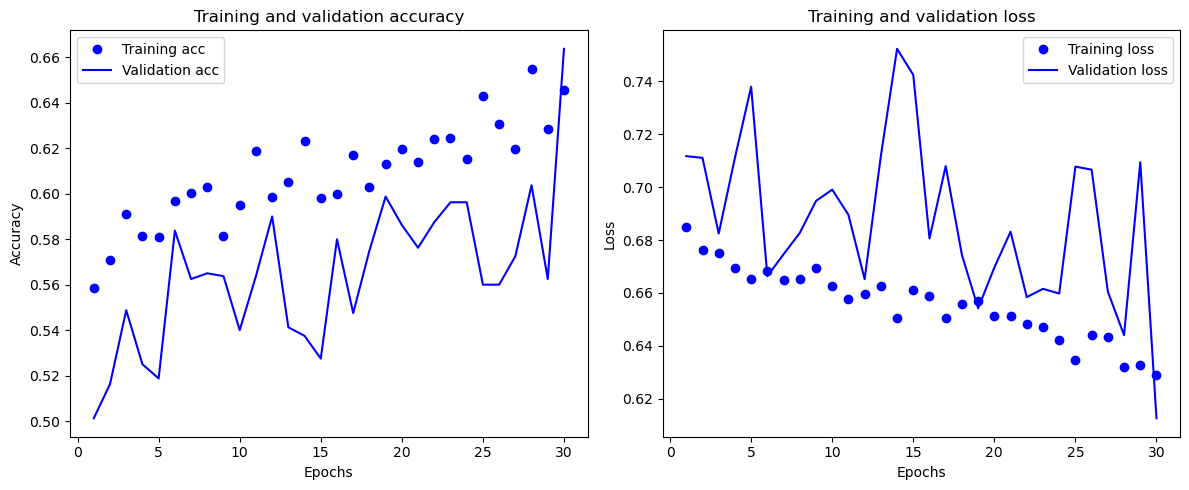

In [54]:
import matplotlib.pyplot as plt

# Assuming history.history contains the keys 'acc', 'val_acc', 'loss', 'val_loss'
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Training and validation accuracy plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')  # Updated to plot actual validation accuracy values
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training and validation loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')  # Updated to plot actual validation loss values
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# 8 Results

The model was evaluated on the test dataset, and the following results were obtained:

- **Test Accuracy**: Approximately 66.50%, indicating that the model correctly classified about two-thirds of the images between the two categories (smiling and not smiling).
- **Test Loss**: Approximately 0.613, which is the average loss of the model on the test dataset, indicating the performance of the model#.

## Analysis

Based on these outcomes, we can infer the following:

1. **Accuracy**: The accuracy is above the 50% baseline of random guessing but suggests there is room for improvement. Adjustments in the model architecture or further data augmentation and extended training may enhance accuracy.

2. **Loss**: The loss value indicates how well the model is performing on the classification task. A loss of 0.613 suggests that the model is not very certain about some of the classifications, indicating a need for model optimization or the use of regularization techniques to reduce overfitting.

3. **Performance Optimization**: Increasing model complexity, adjusting hyperparameters, trying different optimization algorithms, or different data preprocessing methods might help improve model performance.

4. **Further Evaluation**: Employing additional metrics such as the confusion matrix, precision, recall, and F1 score could provide a more comprehensive evaluation of the model's performance and identify areas where the model excels or falls short.


Found 800 images belonging to 2 classes.
40/40 [==============================] - 8s 184ms/step - loss: 0.6133 - acc: 0.6650
test acc: 0.6650000214576721
test loss: 0.6132937073707581


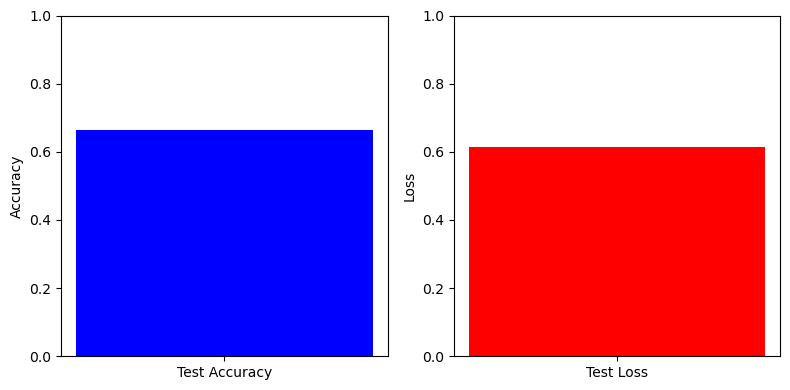

In [55]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Generator for test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,  
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=False  
)

# Evaluation
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)
print('test loss:', test_loss)

# Visualize performance metrics
plt.figure(figsize=(8, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.bar(['Test Accuracy'], [test_acc], color='blue')
plt.ylim(0, 1)  
plt.ylabel('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.bar(['Test Loss'], [test_loss], color='red')
plt.ylim(0, max(test_loss, 1))  
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


# 9 Conclusions

Based on the observed training and validation plots, we can draw the following conclusions:

### Model Performance
The model demonstrates a consistency between training and validation accuracy, indicating no overfitting. However, the accuracy levels suggest that the model's ability to generalize is moderate, highlighting the potential for further improvements.

### Training Stability
Fluctuations in the validation accuracy and loss suggest that the training process may not be stable. This could be improved with better regularization or learning rate scheduling.

### Loss Behavior
The loss trends downward, which is a good sign of learning. However, the spikes in validation loss suggest sensitivity to the validation set's composition or potential overfitting at certain training phases.

### Areas for Improvement
1. **Data Augmentation**: Exploring additional data augmentation techniques could improve model generalization.
2. **Model Complexity**: Increasing the model complexity may enhance the model's learning capacity.
3. **Hyperparameter Tuning**: Experimenting with learning rates, optimizers, and learning rate decay could provide more stable training and better results.
4. **Regularization**: Implementing dropout or L2 regularization may help to reduce volatility and increase generalization.
5. **Evaluation Metrics**: Utilizing additional metrics like precision, recall, and F1 score would provide a broader understanding of model performance.
6. **Extended Training**: More training epochs could be beneficial, provided careful monitoring and regularization are applied to prevent overfitting.

Overall, the model shows a foundational ability to classify images but has significant room for improvement. Strategic modifications to the model architecture, data handling, and training protocol are likely to result in a more accurate and robust classifier.
d robust classifier.


In [57]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [59]:
from keras.preprocessing.image import ImageDataGenerator

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=75,  # Adjust based on the total number of training images and batch size
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)  # Adjust based on the total number of validation images and batch size


Found 2400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/30
75/75 [==============================] - 90s 1s/step - loss: 0.6876 - acc: 0.5675 - val_loss: 0.7003 - val_acc: 0.5000
Epoch 2/30
75/75 [==============================] - 93s 1s/step - loss: 0.6838 - acc: 0.5654 - val_loss: 0.6974 - val_acc: 0.5000
Epoch 3/30
75/75 [==============================] - 94s 1s/step - loss: 0.6785 - acc: 0.5746 - val_loss: 0.6806 - val_acc: 0.5700
Epoch 4/30
75/75 [==============================] - 94s 1s/step - loss: 0.6760 - acc: 0.5742 - val_loss: 0.6895 - val_acc: 0.5512
Epoch 5/30
75/75 [==============================] - 106s 1s/step - loss: 0.6760 - acc: 0.5679 - val_loss: 0.7868 - val_acc: 0.5013
Epoch 6/30
75/75 [==============================] - 97s 1s/step - loss: 0.6787 - acc: 0.5842 - val_loss: 0.6871 - val_acc: 0.5125
Epoch 7/30
75/75 [==============================] - 101s 1s/step - loss: 0.6752 - acc: 0.5838 - val_loss: 0.6842 - val_acc: 0.5288
Epoch

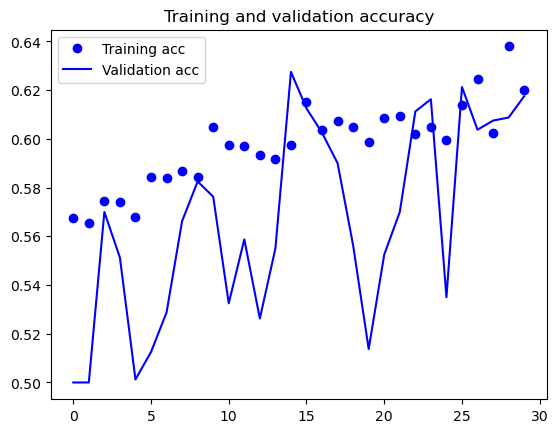

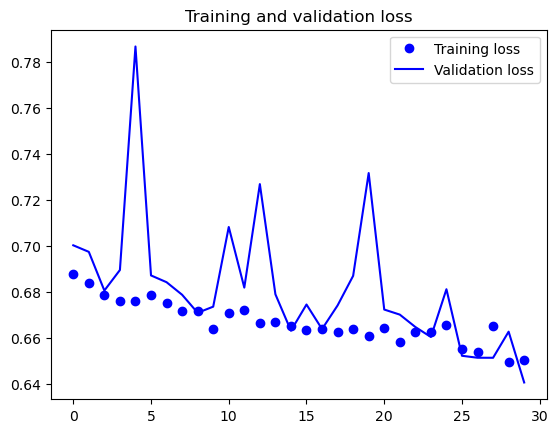

In [60]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
